In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
google_stock_data = pd.read_csv('data_1.csv')
google_stock_data = google_stock_data.drop('Time', axis=1)
print(google_stock_data.head())


         Date  Voltage (V)  Current (A)  Power (W)  Energy (kWh)
0  2024-03-01       234.73         0.06      14.08        0.0035
1  2024-03-01       233.88         0.05      11.69        0.0029
2  2024-03-01       235.18         0.07      16.46        0.0041
3  2024-03-01       230.67         0.09      20.76        0.0052
4  2024-03-01       234.73         0.08      18.78        0.0047


In [5]:
google_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3100 non-null   object 
 1   Voltage (V)   3100 non-null   float64
 2   Current (A)   3100 non-null   float64
 3   Power (W)     3100 non-null   float64
 4   Energy (kWh)  3100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [6]:
google_stock_data['Date'] = pd.to_datetime(google_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,Voltage (V),Current (A),Power (W),Energy (kWh)
Date,,,,
2024-03-01,234.73,0.06,14.08,0.0035
2024-03-01,233.88,0.05,11.69,0.0029
2024-03-01,235.18,0.07,16.46,0.0041
2024-03-01,230.67,0.09,20.76,0.0052
2024-03-01,234.73,0.08,18.78,0.0047


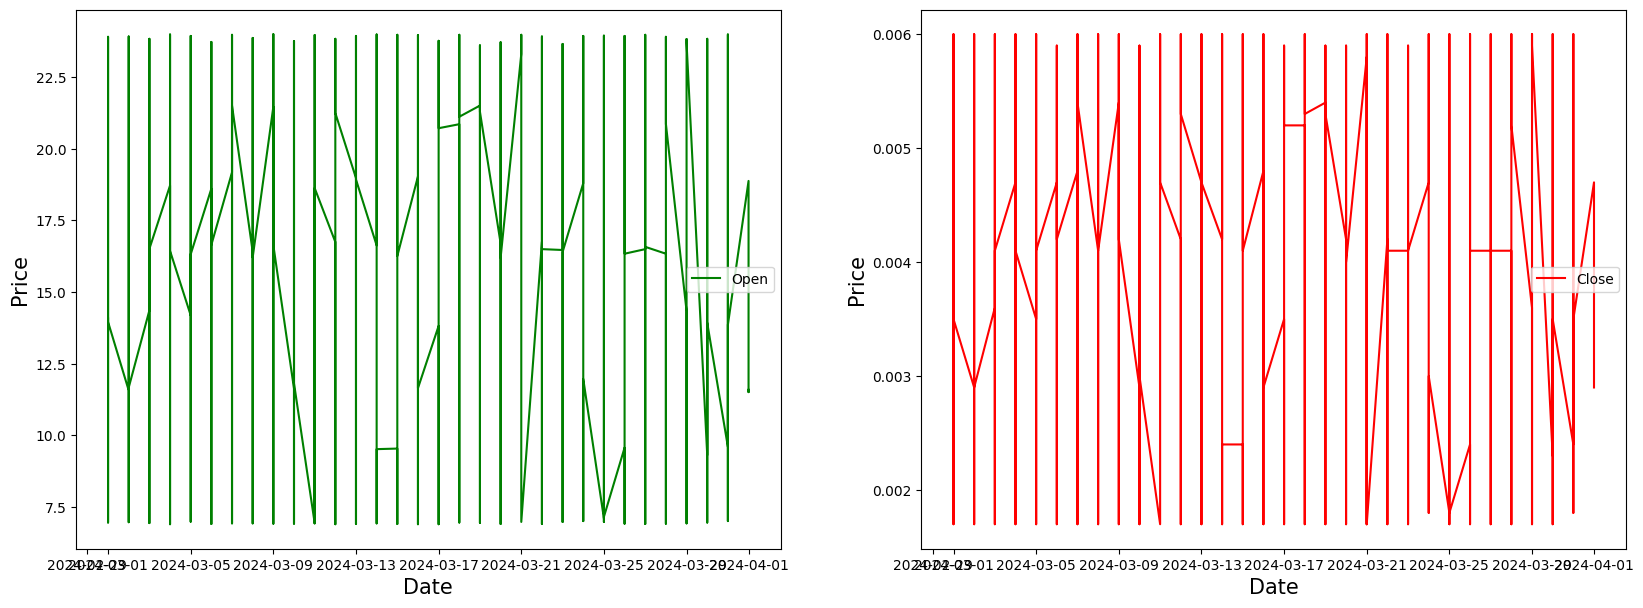

In [7]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['Power (W)'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['Energy (kWh)'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Data Pre-Processing

In [8]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [9]:
google_stock_data.shape

(3100, 4)

In [10]:
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

2480

In [11]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((2480, 4), (620, 4))

In [12]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [13]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [14]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((2430, 50, 4), (2430, 4), (570, 50, 4), (570, 4))

# Creating LSTM model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(4))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            11000     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 31404 (122.67 KB)
Trainable params: 31404 (122.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80


76/76 [==============================] - 11s 57ms/step - loss: 0.0976 - mean_absolute_error: 0.2645 - val_loss: 0.0820 - val_mean_absolute_error: 0.2469
Epoch 2/80
76/76 [==============================] - 3s 34ms/step - loss: 0.0842 - mean_absolute_error: 0.2495 - val_loss: 0.0809 - val_mean_absolute_error: 0.2447
Epoch 3/80
76/76 [==============================] - 3s 34ms/step - loss: 0.0835 - mean_absolute_error: 0.2487 - val_loss: 0.0822 - val_mean_absolute_error: 0.2431
Epoch 4/80
76/76 [==============================] - 3s 34ms/step - loss: 0.0846 - mean_absolute_error: 0.2499 - val_loss: 0.0808 - val_mean_absolute_error: 0.2440
Epoch 5/80
76/76 [==============================] - 3s 35ms/step - loss: 0.0838 - mean_absolute_error: 0.2494 - val_loss: 0.0815 - val_mean_absolute_error: 0.2468
Epoch 6/80
76/76 [==============================] - 3s 35ms/step - loss: 0.0836 - mean_absolute_error: 0.2490 - val_loss: 0.0820 - val_mean_absolute_error: 0.2473
Epoch 7/80
76/76 [=

In [20]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

18/18 [==============================] - 2s 12ms/step


array([[0.4962725 , 0.4922533 , 0.47749296, 0.48157045],
       [0.5029923 , 0.544539  , 0.5307728 , 0.53354144],
       [0.51675445, 0.50528   , 0.49605805, 0.49801406],
       [0.5127341 , 0.51175064, 0.4996095 , 0.50201875],
       [0.52146405, 0.56222636, 0.5478089 , 0.5527008 ]], dtype=float32)

In [21]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[2.3496274e+02, 6.4457729e-02, 1.5065129e+01, 3.7707528e-03],
       [2.3502992e+02, 6.8117723e-02, 1.5976215e+01, 3.9942283e-03],
       [2.3516754e+02, 6.5369599e-02, 1.5382593e+01, 3.8414604e-03],
       [2.3512733e+02, 6.5822542e-02, 1.5443322e+01, 3.8586806e-03],
       [2.3521463e+02, 6.9355845e-02, 1.6267532e+01, 4.0766136e-03]],
      dtype=float32)